## Data Cleaning

#### Import the datasets & Check if they have the same number of columns.

In [68]:
import pandas as pd

# Defining the file paths for the datasets
all_files = ["PitCount_2017.csv", "PitCount_2018.csv", "PitCount_2019.csv", "PitCount_2020.csv", "PitCount_2021.csv"]

# Initializing an empty list to store column names for each dataset
columns_list = []

# Looping through each dataset file
for file in all_files:
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Extracting the column names and appending to the list
    columns_list.append(set(df.columns))

# Checking to see if all datasets have the same columns
if all(x == columns_list[0] for x in columns_list):
    print("All datasets have the exact same columns.")
else:
    print("Datasets have different columns.")

All datasets have the exact same columns.


Each dataset represents a different year. However, they do not have a year column. Adding a year column so that we can merge them into a unified dataset.

In [69]:
# Looping through each dataset file
for file in all_files:
    # Extracting the years from the file name
    year = int(file.split("_")[-1].split(".")[0])
    
    # Read the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Add a "Year" column with the corresponding year value
    df["Year"] = year
    
    # Saving the modified DataFrame back to the original file
    df.to_csv(file, index=False)

    print(f"Year column added to {file} and saved successfully.")


Year column added to PitCount_2017.csv and saved successfully.
Year column added to PitCount_2018.csv and saved successfully.
Year column added to PitCount_2019.csv and saved successfully.
Year column added to PitCount_2020.csv and saved successfully.


Year column added to PitCount_2021.csv and saved successfully.


In [70]:
# Confirming that the Year column was added.
pc17 = pd.read_csv("PitCount_2017.csv")

pc17.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


Merging the datasets

In [71]:
# Initializing an empty list to store DataFrames
dfs = []

# Looping through each dataset file
for file in all_files:
    # Reading the dataset into a DataFrame
    df = pd.read_csv(file)
    
    # Appending the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames in the list into one
pc17_21 = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
pc17_21.head()


,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,"1,128",170,133,825,445,678,4,...,3,9,12,0.0,21,6,15,21,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717,135,53,529,320,397,0,...,7,3,10,0.0,18,14,4,18,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,"1,092",104,125,863,334,738,19,...,2,0,2,0.0,10,4,6,10,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606,116,35,455,222,383,1,...,3,9,12,0.0,18,6,12,18,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155,0,8,147,72,81,0,...,0,0,0,0.0,0,0,0,0,0.0,2017


In [72]:
# Checking the shape of the merged dataset.
pc17_21.shape

(1940, 543)

### Null values.

In [73]:
# Checking for any Null Values

pc17_21.isnull().sum()

CoC Number                                              10
CoC Name                                                10
Count Types                                             19
Overall Homeless                                        10
Overall Homeless - Under 18                             10
                                                        ..
Sheltered ES Homeless Children of Parenting Youth       10
Sheltered TH Homeless Children of Parenting Youth       10
Sheltered Total Homeless Children of Parenting Youth    10
Unsheltered Homeless Children of Parenting Youth        52
Year                                                     0
Length: 543, dtype: int64

In [74]:
# Getting the count of null values for each column.
null_counts = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")


Columns with null values:
CoC Number: 10 null values
CoC Name: 10 null values
Count Types: 19 null values
Overall Homeless: 10 null values
Overall Homeless - Under 18: 10 null values
Overall Homeless - Age 18 to 24: 10 null values
Overall Homeless - Over 24: 10 null values
Overall Homeless - Female: 10 null values
Overall Homeless - Male: 10 null values
Overall Homeless - Transgender: 10 null values
Overall Homeless - Gender that is not Singularly Female or Male: 10 null values
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 10 null values
Overall Homeless - Hispanic/Latin(o)(a)(x): 10 null values
Overall Homeless - White: 10 null values
Overall Homeless - Black, African American, or African: 10 null values
Overall Homeless - Asian or Asian American: 10 null values
Overall Homeless - American Indian, Alaska Native, or Indigenous: 10 null values
Overall Homeless - Native Hawaiian or Other Pacific Islander: 10 null values
Overall Homeless - Multiple Races: 10 null values
Sheltered ES

#### Checking to see if any rows have more than 5 null values.

In [75]:
def count_rows_with_nulls_above_threshold(data, threshold):
    # Count the number of null values in each row
    null_counts = data.isnull().sum(axis=1)
    # Count the number of rows with null values above the threshold
    rows_above_threshold = (null_counts > threshold).sum()
    return rows_above_threshold

# Define the thresholds
thresholds = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 541, 543]

# Iterate through the thresholds and count rows with null values above each threshold
for threshold in thresholds:
    rows_above_threshold = count_rows_with_nulls_above_threshold(pc17_21, threshold)
    print(f"Number of rows with more than {threshold} null values: {rows_above_threshold}")



Number of rows with more than 2 null values: 70
Number of rows with more than 5 null values: 63
Number of rows with more than 10 null values: 55
Number of rows with more than 20 null values: 52
Number of rows with more than 30 null values: 49
Number of rows with more than 40 null values: 49
Number of rows with more than 50 null values: 46
Number of rows with more than 60 null values: 45
Number of rows with more than 70 null values: 40
Number of rows with more than 80 null values: 40
Number of rows with more than 90 null values: 35
Number of rows with more than 100 null values: 10
Number of rows with more than 150 null values: 10
Number of rows with more than 200 null values: 10
Number of rows with more than 300 null values: 10
Number of rows with more than 400 null values: 10
Number of rows with more than 500 null values: 10
Number of rows with more than 541 null values: 5
Number of rows with more than 543 null values: 0


In [76]:
#Drop the rows with 541 null values.
# Count the number of null values in each row
null_counts = pc17_21.isnull().sum(axis=1)

# Define the threshold
threshold = 541

# Filter out rows that exceed the threshold
pc17_21 = pc17_21[null_counts <= threshold]

# Print the shape of the filtered dataset to verify the number of rows
print("Shape of filtered dataset:", pc17_21.shape)

Shape of filtered dataset: (1935, 543)


In [77]:
# Reaccessing how many null valies at a given threshold of rows.

thresholds = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 541, 543]

# Iterate through the thresholds and count rows with null values above each threshold
for threshold in thresholds:
    rows_above_threshold = count_rows_with_nulls_above_threshold(pc17_21, threshold)
    print(f"Number of rows with more than {threshold} null values: {rows_above_threshold}")



Number of rows with more than 2 null values: 65
Number of rows with more than 5 null values: 58
Number of rows with more than 10 null values: 50
Number of rows with more than 20 null values: 47
Number of rows with more than 30 null values: 44
Number of rows with more than 40 null values: 44
Number of rows with more than 50 null values: 41
Number of rows with more than 60 null values: 40
Number of rows with more than 70 null values: 35
Number of rows with more than 80 null values: 35
Number of rows with more than 90 null values: 30
Number of rows with more than 100 null values: 5
Number of rows with more than 150 null values: 5
Number of rows with more than 200 null values: 5
Number of rows with more than 300 null values: 5
Number of rows with more than 400 null values: 5
Number of rows with more than 500 null values: 5
Number of rows with more than 541 null values: 0
Number of rows with more than 543 null values: 0


In [78]:
#Dropping rows with more that 100 null values

#Drop the rows with 541 null values.
# Count the number of null values in each row
null_counts = pc17_21.isnull().sum(axis=1)

# Define the threshold
threshold = 100

# Filter out rows that exceed the threshold
pc17_21 = pc17_21[null_counts <= threshold]

# Print the shape of the filtered dataset to verify the number of rows
print("Shape of filtered dataset:", pc17_21.shape)

Shape of filtered dataset: (1930, 543)


In [79]:
# Reaccessing how many null valies at a given threshold of rows.
thresholds = [2, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 400, 500, 541, 543]

# Iterate through the thresholds and count rows with null values above each threshold
for threshold in thresholds:
    rows_above_threshold = count_rows_with_nulls_above_threshold(pc17_21, threshold)
    print(f"Number of rows with more than {threshold} null values: {rows_above_threshold}")



Number of rows with more than 2 null values: 60
Number of rows with more than 5 null values: 53
Number of rows with more than 10 null values: 45
Number of rows with more than 20 null values: 42
Number of rows with more than 30 null values: 39
Number of rows with more than 40 null values: 39
Number of rows with more than 50 null values: 36
Number of rows with more than 60 null values: 35
Number of rows with more than 70 null values: 30
Number of rows with more than 80 null values: 30
Number of rows with more than 90 null values: 25
Number of rows with more than 100 null values: 0
Number of rows with more than 150 null values: 0
Number of rows with more than 200 null values: 0
Number of rows with more than 300 null values: 0
Number of rows with more than 400 null values: 0
Number of rows with more than 500 null values: 0
Number of rows with more than 541 null values: 0
Number of rows with more than 543 null values: 0


Dropping all the null values form CoC Name and CoC Number.

In [80]:
#looking at the unique values in column: Count Types
print(pc17_21['Count Types'].unique())

['Sheltered and Unsheltered Count' nan 'Sheltered-Only Count' 'aa'
 'Sheltered and Partial Unsheltered Count']


In [81]:
# Get the count of null values for each column
null_counts2 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values after dealing with three columns:")
for column, null_count in null_counts2.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values after dealing with three columns:
CoC Number: 5 null values
Count Types: 9 null values
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple R

In [82]:
null_coc_number_rows = pc17_21[pc17_21['CoC Number'].isnull()]

# Print the rows with null values in the "CoC Number" column
null_coc_number_rows

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
385,NaN,Total,NaN,"550,996","114,529","50,992","385,475","214,975","333,049","2,088",...,"5,868","2,908","8,776",460.0,"12,006","7,336","4,097","11,433",573.0,2017
773,NaN,Total,NaN,"552,830","111,592","48,319","392,919","216,211","332,925","2,521",...,"5,851","2,321","8,172",465.0,"11,320","7,680","3,112","10,792",528.0,2018
1160,NaN,Total,NaN,"567,715","107,069","45,629","415,017","219,911","343,187","3,255",...,"5,052","1,952","7,004",501.0,"9,779","6,612","2,597","9,209",570.0,2019
1548,NaN,Total,NaN,"580,466","106,364","45,243","428,859","223,578","352,211","3,161",...,"4,938","1,769","6,707",523.0,"9,495","6,415","2,325","8,740",755.0,2020
1937,NaN,Total,NaN,"380,630","84,259","28,289","259,107","155,990","212,835","1,544",...,"4,136","1,578","5,714",251.0,"7,419","5,141","1,944","7,085",334.0,2021


In [83]:
#Dropping all the CoC Number with null values.

# Drop rows with null values in the "CoC Number" column
pc17_21 = pc17_21.dropna(subset=['CoC Number', 'Count Types'])

# Print the shape of the dataset after dropping rows
print("Shape of dataset after dropping rows with null CoC Number & Count Types:", pc17_21.shape)


Shape of dataset after dropping rows with null CoC Number & Count Types: (1921, 543)


In [84]:
# Get the count of null values for each column
null_counts2 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values after dealing with three columns:")
for column, null_count in null_counts2.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values after dealing with three columns:
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple Races: 34 null values
Unsheltered Homeless Individuals

In [85]:
null_columns = pc17_21.columns[pc17_21.isnull().any()]

# Filter columns with null values that are numeric type
numeric_null_columns = [col for col in null_columns if pc17_21[col].dtype == 'float64' or pc17_21[col].dtype == 'int64']

if len(numeric_null_columns) == len(null_columns):
    print("All columns with null values are numeric type.")
else:
    print("Columns with null values include non-numeric types.")

Columns with null values include non-numeric types.


Finding the non-numeric columns.

In [86]:
#finding the non numeric column.
null_columns = pc17_21.columns[pc17_21.isnull().any()]

# Filter non-numeric columns with null values
non_numeric_null_columns = [col for col in null_columns if pc17_21[col].dtype not in ['float64', 'int64']]

print("Non-numeric columns with null values:")
print(non_numeric_null_columns)

Non-numeric columns with null values:
['Unsheltered Homeless - Under 18', 'Unsheltered Homeless - Age 18 to 24', 'Unsheltered Homeless - Over 24', 'Unsheltered Homeless - Female', 'Unsheltered Homeless - Male', 'Unsheltered Homeless - Transgender', 'Unsheltered Homeless - Gender that is not Singularly Female or Male', 'Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 'Unsheltered Homeless - Hispanic/Latin(o)(a)(x)', 'Unsheltered Homeless - White', 'Unsheltered Homeless - Black, African American, or African', 'Unsheltered Homeless - Asian or Asian American', 'Unsheltered Homeless - American Indian, Alaska Native, or Indigenous', 'Unsheltered Homeless - Native Hawaiian or Other Pacific Islander', 'Unsheltered Homeless - Multiple Races', 'Unsheltered Homeless Individuals', 'Unsheltered Homeless Individuals - Under 18', 'Unsheltered Homeless Individuals - Age 18 to 24', 'Unsheltered Homeless Individuals - Over 24', 'Unsheltered Homeless Individuals - Female', 'Unsheltered Homeless 

Dealing with numeric column with null values.

In [87]:
numeric_null_columns = [col for col in pc17_21.columns if pc17_21[col].dtype in ['float64', 'int64'] and pc17_21[col].isnull().any()]

# Replace NaN values with 0 in numerical columns
pc17_21[numeric_null_columns] = pc17_21[numeric_null_columns].fillna(0)

# Check if all null values in numerical columns have been replaced
if pc17_21[numeric_null_columns].isnull().sum().sum() == 0:
    print("All null values in numerical columns have been replaced with 0.")
else:
    print("Some null values in numerical columns remain.")

All null values in numerical columns have been replaced with 0.


Checking how many columns left with null values

In [88]:
# Get the count of null values for each column
null_counts3 = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts3.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")

Columns with null values:
Unsheltered Homeless - Under 18: 32 null values
Unsheltered Homeless - Age 18 to 24: 35 null values
Unsheltered Homeless - Over 24: 35 null values
Unsheltered Homeless - Female: 34 null values
Unsheltered Homeless - Male: 34 null values
Unsheltered Homeless - Transgender: 35 null values
Unsheltered Homeless - Gender that is not Singularly Female or Male: 34 null values
Unsheltered Homeless - Non-Hispanic/Non-Latin(o)(a)(x): 36 null values
Unsheltered Homeless - Hispanic/Latin(o)(a)(x): 35 null values
Unsheltered Homeless - White: 35 null values
Unsheltered Homeless - Black, African American, or African: 35 null values
Unsheltered Homeless - Asian or Asian American: 35 null values
Unsheltered Homeless - American Indian, Alaska Native, or Indigenous: 35 null values
Unsheltered Homeless - Native Hawaiian or Other Pacific Islander: 35 null values
Unsheltered Homeless - Multiple Races: 34 null values
Unsheltered Homeless Individuals: 25 null values
Unsheltered Home

In [89]:
#Looking for the unique values in these columns that were not considered numeric.
null_counts = pc17_21.isnull().sum()

# Print columns with null values and their respective counts
print("Columns with null values:")
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"{column}: {null_count} null values")
        unique_values = pc17_21[column].unique()
        print(f"Unique values in {column}: {unique_values}\n")

Columns with null values:
Unsheltered Homeless - Under 18: 32 null values
Unique values in Unsheltered Homeless - Under 18: ['0' '10' '1' '3' '42' '27' '12' '33' '24' '664' '101' '76' '7' '119' '46'
 '270' '32' '242' '6' '34' '9' '56' '8' '2' '18' '38' '39' '4' '16' '17'
 '49' '84' '20' '48' '726' '219' '25' '107' '35' '11' '13' '40' '29' '31'
 '30' '507' '55' '23' '5' '19' '490' '124' '43' '15' '93' '303' '170'
 '153' '44' '21' '22' '58' '175' '120' '139' '106' '92' '14' '26' '241'
 '113' '67' '51' '129' '1,167' '75' '131' '218' '60' '236' '237' '140'
 '80' '54' '57' '36' '936' '248' '73' '52' '47' '163' '110' '294' '178'
 '127' '105' '297' '37' '112' '212' '78' '97' '931' '28' '91' '150' '180'
 '245' '148' '45' '397' '346' '125' '155' '159' '901' '261' '247' '68'
 '61' '388' '104' '282' '87' '168' '585' '77' '267' '66' '1,415' '50'
 '230' '59' '62' '69' '64' '1,628' '83' '274' '109' '238' '136' '108'
 '269' '409' '41' '964' '100' '196' '284' '654' '265' nan '913' '280'
 '154' '173' '

We see that there a commas being used to separate the numbers at the thousand level. Going to replace all the commas after the third column.

In [90]:
# Function to remove commas and convert to float
def remove_commas_and_convert_to_float(value):
    if pd.isnull(value):
        return value
    else:
        try:
            return float(value.replace(',', ''))
        except AttributeError:  # Handling the case if it's already a float
            return value
        
# Apply the function to columns starting from the fourth column
for col in pc17_21.columns[3:]:
    pc17_21[col] = pc17_21[col].apply(remove_commas_and_convert_to_float)




Replacing the null values with 0s.

In [91]:
# Find columns with null values
columns_with_null_values = pc17_21.columns[pc17_21.isnull().any()]

# Replace null values with 0
pc17_21[columns_with_null_values] = pc17_21[columns_with_null_values].fillna(0)

# Verify that null values have been replaced
print("Null values replaced with 0:")



Null values replaced with 0:


In [92]:
# Check if there are any null values remaining in the dataset
if pc17_21.isnull().any().any():
    print("There are still null values remaining in the dataset.")
else:
    print("There are no null values remaining in the dataset.")


There are no null values remaining in the dataset.


In [93]:
pc17_21.head(5)

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered ES Homeless Parenting Youth Age 18-24,Sheltered TH Homeless Parenting Youth Age 18-24,Sheltered Total Homeless Parenting Youth Age 18-24,Unsheltered Homeless Parenting Youth Age 18-24,Overall Homeless Children of Parenting Youth,Sheltered ES Homeless Children of Parenting Youth,Sheltered TH Homeless Children of Parenting Youth,Sheltered Total Homeless Children of Parenting Youth,Unsheltered Homeless Children of Parenting Youth,Year
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,1128.0,170.0,133.0,825.0,445.0,678.0,4.0,...,3.0,9.0,12.0,0.0,21.0,6.0,15.0,21.0,0.0,2017
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717.0,135.0,53.0,529.0,320.0,397.0,0.0,...,7.0,3.0,10.0,0.0,18.0,14.0,4.0,18.0,0.0,2017
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,1092.0,104.0,125.0,863.0,334.0,738.0,19.0,...,2.0,0.0,2.0,0.0,10.0,4.0,6.0,10.0,0.0,2017
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606.0,116.0,35.0,455.0,222.0,383.0,1.0,...,3.0,9.0,12.0,0.0,18.0,6.0,12.0,18.0,0.0,2017
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155.0,0.0,8.0,147.0,72.0,81.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017


In [94]:
print(pc17_21.dtypes)

CoC Number                                               object
CoC Name                                                 object
Count Types                                              object
Overall Homeless                                        float64
Overall Homeless - Under 18                             float64
                                                         ...   
Sheltered ES Homeless Children of Parenting Youth       float64
Sheltered TH Homeless Children of Parenting Youth       float64
Sheltered Total Homeless Children of Parenting Youth    float64
Unsheltered Homeless Children of Parenting Youth        float64
Year                                                      int64
Length: 543, dtype: object


## Exploratory Analysis

In [95]:
for c in pc17_21.columns:
    print(c)


CoC Number
CoC Name
Count Types
Overall Homeless
Overall Homeless - Under 18
Overall Homeless - Age 18 to 24
Overall Homeless - Over 24
Overall Homeless - Female
Overall Homeless - Male
Overall Homeless - Transgender
Overall Homeless - Gender that is not Singularly Female or Male
Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)
Overall Homeless - Hispanic/Latin(o)(a)(x)
Overall Homeless - White
Overall Homeless - Black, African American, or African
Overall Homeless - Asian or Asian American
Overall Homeless - American Indian, Alaska Native, or Indigenous
Overall Homeless - Native Hawaiian or Other Pacific Islander
Overall Homeless - Multiple Races
Sheltered ES Homeless
Sheltered ES Homeless - Under 18
Sheltered ES Homeless - Age 18 to 24
Sheltered ES Homeless - Over 24
Sheltered ES Homeless - Female
Sheltered ES Homeless - Male
Sheltered ES Homeless - Transgender
Sheltered ES Homeless - Gender that is not Singularly Female or Male
Sheltered ES Homeless - Non-Hispanic/Non-Latin(o)(a)(

#### Sections to explore:
- Overall Homeless Population
- Sheltered Vs. Unsheltered homeless population
- The chronically homeless.

/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9108/3662989539.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars


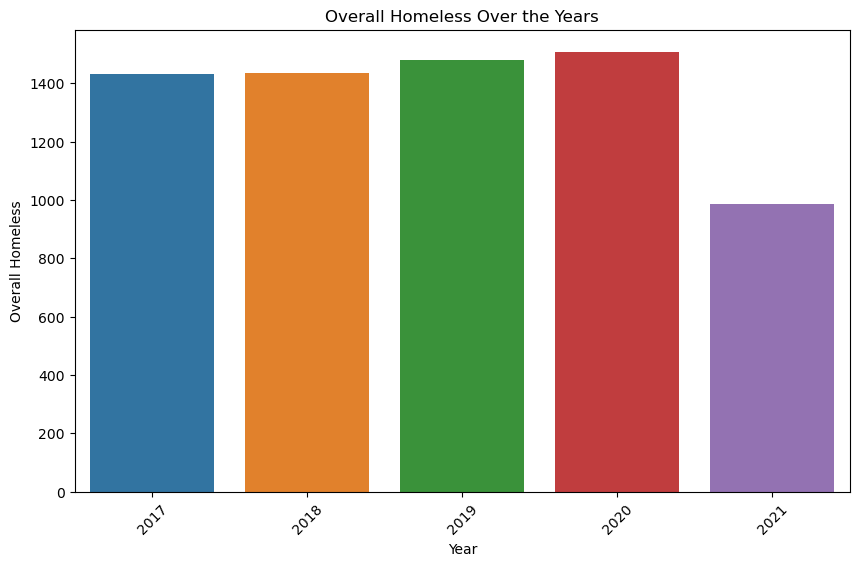

In [96]:
#Visualizing Overall Homeless from 2017 - 2021

import seaborn as sns
import matplotlib.pyplot as plt

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create the bar plot
sns.barplot(x='Year', y='Overall Homeless', data=pc17_21, ci=None)  # ci=None disables error bars

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years')
plt.xlabel('Year')
plt.ylabel('Overall Homeless')

# Show plot
plt.show()

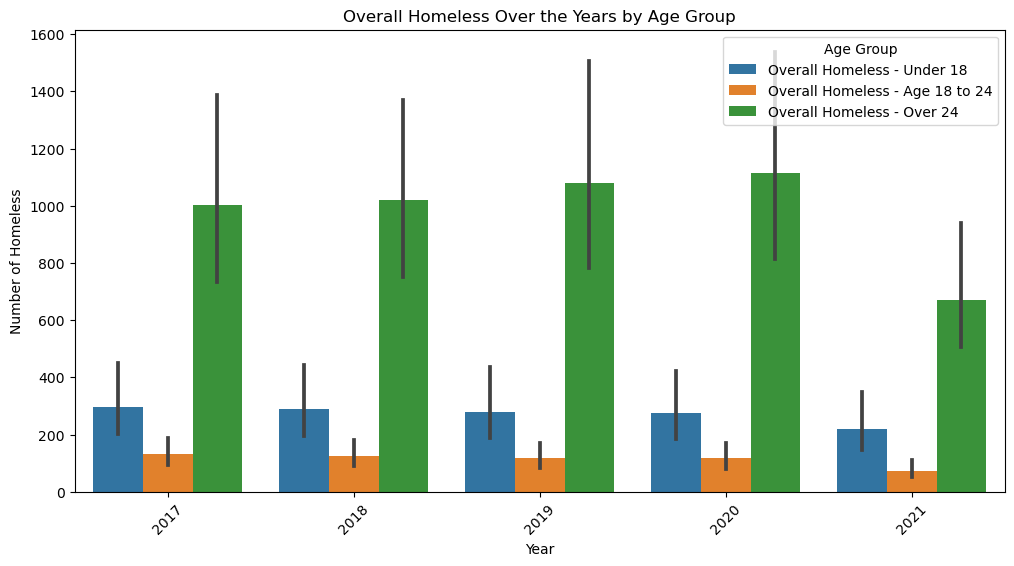

In [97]:
# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Under 18', 
                                'Overall Homeless - Age 18 to 24', 
                                'Overall Homeless - Over 24'], 
                    var_name='Age Group', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Age Group', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Age Group')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Age Group')
plt.show()

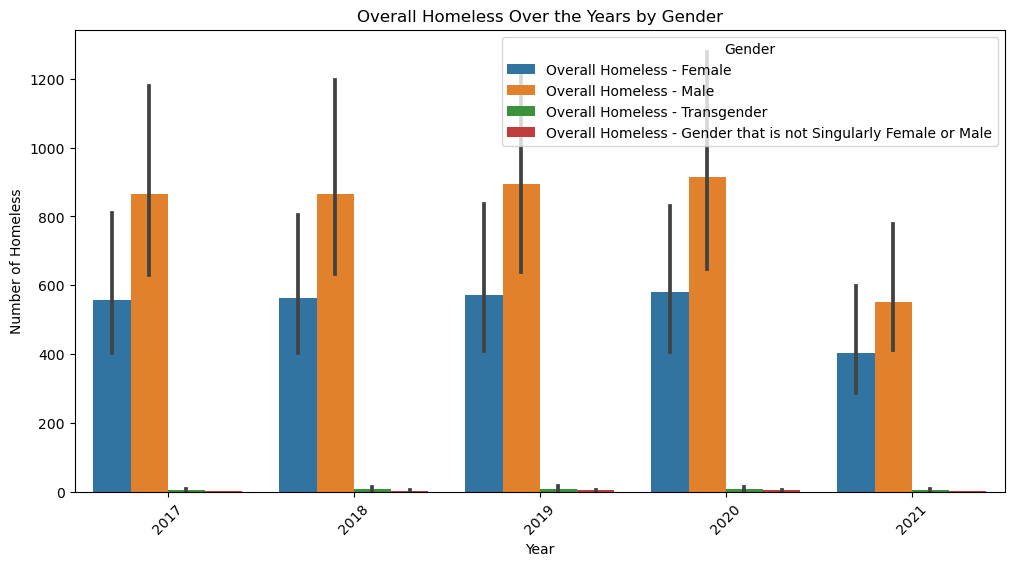

In [98]:
#Homelessness among the genders over the time.

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Female', 
                                'Overall Homeless - Male', 
                                'Overall Homeless - Transgender',
                                'Overall Homeless - Gender that is not Singularly Female or Male'], 
                    var_name='Gender', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Gender', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Gender')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Gender')
plt.show()

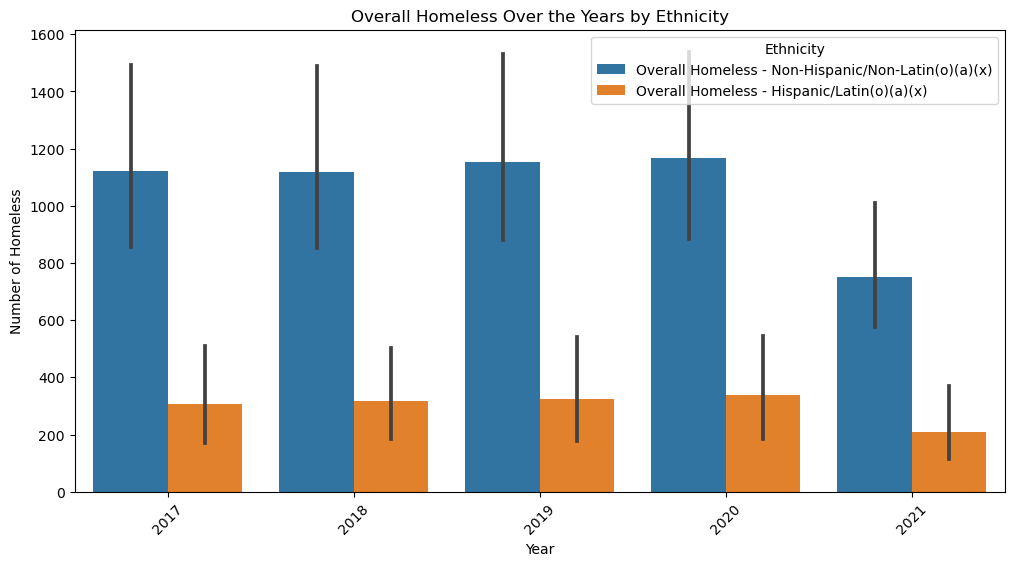

In [99]:
# Homelessness among Ethnicities.

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - Non-Hispanic/Non-Latin(o)(a)(x)', 
                                'Overall Homeless - Hispanic/Latin(o)(a)(x)'], 
                    var_name='Ethnicity', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Ethnicity', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Ethnicity')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Ethnicity')
plt.show()

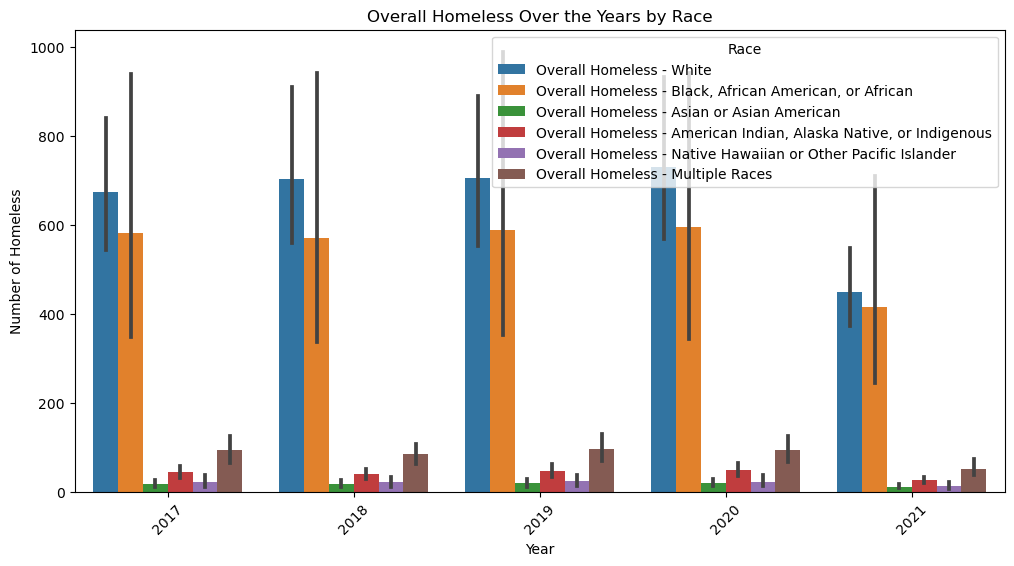

In [100]:
#Homelessness among the genders over the time.

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Melt the DataFrame to reshape it for seaborn
melted_df = pc17_21.melt(id_vars=['Year'], 
                    value_vars=['Overall Homeless - White', 
                                'Overall Homeless - Black, African American, or African',
                                'Overall Homeless - Asian or Asian American',
                                'Overall Homeless - American Indian, Alaska Native, or Indigenous',
                                'Overall Homeless - Native Hawaiian or Other Pacific Islander',
                                'Overall Homeless - Multiple Races'], 
                    var_name='Race', 
                    value_name='Number of Homeless')

# Create the bar plot
sns.barplot(x='Year', y='Number of Homeless', hue='Race', data=melted_df)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set plot title and labels
plt.title('Overall Homeless Over the Years by Race')
plt.xlabel('Year')
plt.ylabel('Number of Homeless')

# Show plot
plt.legend(title='Race')
plt.show()

Among the Overall Homeless population we see a downward trend in the number of homeless people on the street. We know that homelessness is a bigger problem today than ever before. The downward trend is probably due to the Covid-19 pandemic. Will have to bring in more data to create a clear picture.

## Bringing in more datasets.

Steps:
1. Clean the datasets.
    - Make sure there are no commas in them.
    - Nulls values
        - If the first three columns have null values then remove them.
        - If the numeric columns have null values fill them with 0.
2. Check which columns are similar across the board.
3. Combine the datasets.
4. Add "State" column in all the datasets based on the CoC County.
5. Do Visualizations on Tableau.



In [101]:
# Define the list of files
all_files = ["PitCount_2007.csv", "PitCount_2008.csv", "PitCount_2009.csv", "PitCount_2010.csv", "PitCount_2011.csv","PitCount_2011.csv","PitCount_2012.csv","PitCount_2013.csv","PitCount_2014.csv","PitCount_2015.csv","PitCount_2016.csv","PitCount_2022.csv","PitCount_2023.csv"]

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Replace commas in each cell from "Overall Homeless" up to the last column excluding "Year"
    df.loc[:, "Overall Homeless":df.columns[-2]] = df.loc[:, "Overall Homeless":df.columns[-2]].replace(',', '', regex=True)
    
    # Convert columns from "Overall Homeless" up to the last column excluding "Year" to float
    df.loc[:, "Overall Homeless":df.columns[-2]] = df.loc[:, "Overall Homeless":df.columns[-2]].astype(float)
    
    # Replace NaN values with 0 only for the columns starting from "Overall Homeless"
    df.loc[:, "Overall Homeless":] = df.loc[:, "Overall Homeless":].fillna(0)
    
    # Add a "Year" column if it doesn't exist and insert the year based on the name of the dataset
    if "Year" not in df.columns:
        year = int(file.split("_")[1].split(".")[0])
        df["Year"] = year
    
    # Write the modified DataFrame back to CSV
    df.to_csv(file, index=False)



In [102]:
# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Print the data types of columns starting from "Overall Homeless"
    print("Data Types of Columns starting from 'Overall Homeless' in", file)
    print(df.loc[:, "Overall Homeless":].dtypes)
    print()

Data Types of Columns starting from 'Overall Homeless' in PitCount_2007.csv
Overall Homeless                                    float64
Sheltered ES Homeless                               float64
Sheltered TH Homeless                               float64
Sheltered Total Homeless                            float64
Unsheltered Homeless                                float64
Overall Homeless Individuals                        float64
Sheltered ES Homeless Individuals                   float64
Sheltered TH Homeless Individuals                   float64
Sheltered Total Homeless Individuals                float64
Unsheltered Homeless Individuals                    float64
Overall Homeless People in Families                 float64
Sheltered ES Homeless People in Families            float64
Sheltered TH Homeless People in Families            float64
Sheltered Total Homeless People in Families         float64
Unsheltered Homeless People in Families             float64
Overall Homeless Family 

In [103]:
#checking to see which columns in which datasets are object type after Overall Homeless column

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Check for object types after the column "Overall Homeless"
    object_columns = df.select_dtypes(include=['object']).columns
    object_columns_after_overall_homeless = [col for col in object_columns if df.columns.get_loc(col) > df.columns.get_loc("Overall Homeless")]
    
    # Print the result
    if len(object_columns_after_overall_homeless) > 0:
        print(f"In file {file}, there are object types after the column 'Overall Homeless': {object_columns_after_overall_homeless}")
    else:
        print(f"In file {file}, there are no object types after the column 'Overall Homeless'")


In file PitCount_2007.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2008.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2009.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2010.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2011.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2011.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2012.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2013.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2014.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2015.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2016.csv, there are no object types after the column 'Overall Homeless'
In file PitCount_2022

In [104]:
# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Check for null values
    null_columns = df.columns[df.isnull().any()]
    
    # Print columns with null values along with the dataset name
    if len(null_columns) > 0:
        print(f"In file {file}, the following columns have null values:")
        for col in null_columns:
            print(col)
    else:
        print(f"In file {file}, there are no null values.")

In file PitCount_2007.csv, there are no null values.
In file PitCount_2008.csv, the following columns have null values:
CoC Number
CoC Name
In file PitCount_2009.csv, the following columns have null values:
Count Types
In file PitCount_2010.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2011.csv, the following columns have null values:
CoC Number
CoC Name
Count Types


In file PitCount_2011.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2012.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2013.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2014.csv, the following columns have null values:
Count Types
In file PitCount_2015.csv, the following columns have null values:
Count Types
In file PitCount_2016.csv, the following columns have null values:
Count Types
In file PitCount_2022.csv, the following columns have null values:
CoC Number
CoC Name
Count Types
In file PitCount_2023.csv, the following columns have null values:
CoC Number
CoC Name
CoC Category
Count Types


Dealing with Null values from column CoC Number and CoC Name
1. Don't drop the null values from these columns.
2. Combine all the dataset: 2007 - 2023
3. Check if CoC Number has a null values but its corresponding value in CoC Name is filled and Vis Versa.
4. If its true use the columns to find the name of the CoC Number or CoC Name from the other rows and fill them.

This will help with us not loosing so many datapoints.

In [105]:
# Initialize a set to store column names
common_columns = set(pc17_21.columns)

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Find common columns between the current dataset and pc17_21 dataset
    common_columns = common_columns.intersection(set(df.columns))

# Print common columns
if len(common_columns) > 0:
    print("Common columns between pc17_21 and other datasets:")
    for col in common_columns:
        print(col)
else:
    print("There are no common columns between pc17_21 and other datasets.")

Common columns between pc17_21 and other datasets:
Overall Homeless Family Households
CoC Name
Sheltered Total Chronically Homeless Individuals
Overall Homeless Individuals
Sheltered ES Homeless People in Families
Year
Sheltered ES Homeless Individuals
Sheltered TH Homeless People in Families
Unsheltered Homeless People in Families
Sheltered Total Homeless Family Households
Sheltered TH Homeless Family Households
Sheltered TH Homeless Individuals
Sheltered ES Homeless Family Households
Sheltered Total Homeless
Unsheltered Homeless
Unsheltered Chronically Homeless Individuals
Sheltered TH Homeless
Overall Homeless People in Families
Overall Homeless
Sheltered Total Homeless People in Families
Overall Chronically Homeless Individuals
Unsheltered Homeless Family Households
CoC Number
Sheltered ES Homeless
Unsheltered Homeless Individuals
Sheltered Total Homeless Individuals


### This is a good sign that all the 17 datasets have multiple similar column.

Combining all the datasets. Knowing that the number of columns are different in all the datasets. Will be combining all of them and not leaving any column out.

In [106]:
# Initialize the combined dataset with pc17_21
PitCount_07_23 = pc17_21.copy()

# Iterate over each file
for file in all_files:
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file)
    
    # Merge the datasets based on common columns
    PitCount_07_23 = pd.merge(PitCount_07_23, df, how='outer')

# Save the combined dataset
PitCount_07_23.to_csv("PC_07_23.csv", index=False)


In [107]:
PitCount_07_23.head()

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,1128.0,170.0,133.0,825.0,445.0,678.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,717.0,135.0,53.0,529.0,320.0,397.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,1092.0,104.0,125.0,863.0,334.0,738.0,19.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,606.0,116.0,35.0,455.0,222.0,383.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,155.0,0.0,8.0,147.0,72.0,81.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
PitCount_07_23.shape

(6536, 663)

In [109]:
PitCount_07_23.isnull().sum()

CoC Number                                                  18
CoC Name                                                    22
Count Types                                                798
Overall Homeless                                             0
Overall Homeless - Under 18                               2306
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6145
Unsheltered Homeless People in Families - Age 35 to 44    6145
Unsheltered Homeless People in Families - Age 45 to 54    6145
Unsheltered Homeless People in Families - Age 55 to 64    6145
Unsheltered Homeless People in Families - Over 64         6145
Length: 663, dtype: int64

Finding any common ground among null values for column CoC Name and CoC Number

In [110]:
null_values_CoCname = PitCount_07_23[PitCount_07_23['CoC Name'].isnull()]
null_values_CoCname


,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
2688,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2689,a MO-604 covers territory in both Missouri and...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3455,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3456,a MO-604 covers territory in both Missouri and...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3841,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3842,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3843,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
null_values_CoCnum = PitCount_07_23[PitCount_07_23['CoC Number'].isnull()]
null_values_CoCnum


,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
2687,NaN,Total,NaN,639784.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2688,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3454,NaN,Total,NaN,637077.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3455,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3838,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3841,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3842,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3843,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
null_values_CountTypes = PitCount_07_23[PitCount_07_23['Count Types'].isnull()]
null_values_CountTypes

,CoC Number,CoC Name,Count Types,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,Overall Homeless - Transgender,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
1921,AK-500,Anchorage CoC,NaN,974.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1922,AK-501,Alaska Balance of State CoC,NaN,668.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",NaN,2104.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1924,AL-501,Mobile City & County/Baldwin County CoC,NaN,649.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1925,AL-502,Florence/Northwest Alabama CoC,NaN,265.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6146,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6147,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6148,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6149,a MO-604 covers territory in both Missouri and...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Dealing with null values in CoC Name, CoC Number and Count Types.

Null values in column CoC Name and CoC Number are coming from the Post Notes on the respective datasets.

Will be droping them.

In [113]:
# Drop nan from CoC Name and CoC Number
PitCount_07_23 = PitCount_07_23.dropna(subset=['CoC Name', 'CoC Number'])

# Reset the index after dropping rows
PitCount_07_23 = PitCount_07_23.reset_index(drop = True)

# Save the modified dataset
PitCount_07_23.to_csv("PC_07_23.csv", index=False)



In [114]:
PitCount_07_23.isnull().sum()

CoC Number                                                   0
CoC Name                                                     0
Count Types                                                774
Overall Homeless                                             0
Overall Homeless - Under 18                               2291
                                                          ... 
Unsheltered Homeless People in Families - Age 25 to 34    6127
Unsheltered Homeless People in Families - Age 35 to 44    6127
Unsheltered Homeless People in Families - Age 45 to 54    6127
Unsheltered Homeless People in Families - Age 55 to 64    6127
Unsheltered Homeless People in Families - Over 64         6127
Length: 663, dtype: int64

In [115]:
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', 'Sheltered-Only Count', 'aa',
       'Sheltered and Partial Unsheltered Count', nan,
       'No 2010 PIT Count', 'Sheltered-Only Count*'], dtype=object)

In [116]:
# Remove rows where 'Count Types' column has values 'aa' or 0
PitCount_07_23 = PitCount_07_23[(PitCount_07_23['Count Types'] != 'aa') & (PitCount_07_23['Count Types'] != 0)]

# Reset the index after removing rows
PitCount_07_23 = PitCount_07_23.reset_index(drop=True)

PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', nan,
       'No 2010 PIT Count', 'Sheltered-Only Count*'], dtype=object)

In [117]:
# Iterate over rows with NaN values in 'Count Types' column
for index, row in PitCount_07_23[PitCount_07_23['Count Types'].isnull()].iterrows():
    # Get CoC Number and Year of the current row
    coc_number = row['CoC Number']
    current_year = row['Year']
    
    # Find similar CoC Numbers from the year before and after
    similar_rows_before = PitCount_07_23[(PitCount_07_23['CoC Number'] == coc_number) & (PitCount_07_23['Year'] == current_year - 1) & (~PitCount_07_23['Count Types'].isnull())]
    similar_rows_after = PitCount_07_23[(PitCount_07_23['CoC Number'] == coc_number) & (PitCount_07_23['Year'] == current_year + 1) & (~PitCount_07_23['Count Types'].isnull())]
    
    # If similar rows are found and have the same 'Count Types', fill the NaN
    if len(similar_rows_before) > 0 and len(similar_rows_after) > 0:
        count_type_before = similar_rows_before.iloc[0]['Count Types']
        count_type_after = similar_rows_after.iloc[0]['Count Types']
        if count_type_before == count_type_after:
            PitCount_07_23.at[index, 'Count Types'] = count_type_before
    else:
        print("No such conditionality met.")


No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionality met.
No such conditionali

Since no such condition met - will be dropping the Nan columns under Count Type. The reason being that while we can impute the null values using Most Frequent Values on the column so even based on either what the previous year or next year Count Type was for the CoC Number, it wont really be accurate and could lead to overfitting.

Therefore will be droping all the Nan in Count Type.

In [118]:
# Drop rows with NaN values in 'Count Types' column
PitCount_07_23 = PitCount_07_23.dropna(subset=['Count Types'])

# Reset the index after dropping rows
PitCount_07_23 = PitCount_07_23.reset_index(drop=True)

#Print the unique values of Count Type
PitCount_07_23['Count Types'].unique()

array(['Sheltered and Unsheltered Count', 'Sheltered-Only Count',
       'Sheltered and Partial Unsheltered Count', 'No 2010 PIT Count',
       'Sheltered-Only Count*'], dtype=object)

1. Bringing the year column before Overall Homeless column.
2. Adding a state column and retriving that data from the CoC Number column. This will be used for visualization on a US Maps on Tableau.

In [119]:
# Remove the "Year" column from its current position
year_column = PitCount_07_23.pop("Year")

# Convert the "Year" column to integer type
year_column = year_column.astype(int)

# Insert the "Year" column right before the "Overall Homeless" column
overall_homeless_index = PitCount_07_23.columns.get_loc("Overall Homeless")
PitCount_07_23.insert(overall_homeless_index, "Year", year_column)

PitCount_07_23.head()


/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9108/918942705.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PitCount_07_23.insert(overall_homeless_index, "Year", year_column)


,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,Overall Homeless - Male,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,678.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,397.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,383.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [120]:
PitCount_07_23['CoC Number'].unique()

array(['AK-500', 'AK-501', 'AL-500', 'AL-501', 'AL-502', 'AL-503',
       'AL-504', 'AL-505', 'AL-506', 'AL-507', 'AR-500', 'AR-501',
       'AR-503', 'AR-505', 'AR-508', 'AZ-500', 'AZ-501', 'AZ-502',
       'CA-500', 'CA-501', 'CA-502', 'CA-503', 'CA-504', 'CA-505',
       'CA-506', 'CA-507', 'CA-508', 'CA-509', 'CA-510', 'CA-511',
       'CA-512', 'CA-513', 'CA-514', 'CA-515', 'CA-516', 'CA-517',
       'CA-518', 'CA-519', 'CA-520', 'CA-521', 'CA-522', 'CA-523',
       'CA-524', 'CA-525', 'CA-526', 'CA-527', 'CA-529', 'CA-530',
       'CA-600', 'CA-601', 'CA-602', 'CA-603', 'CA-604', 'CA-606',
       'CA-607', 'CA-608', 'CA-609', 'CA-611', 'CA-612', 'CA-613',
       'CA-614', 'CO-500', 'CO-503', 'CO-504', 'CT-503', 'CT-505',
       'DC-500', 'DE-500', 'FL-500', 'FL-501', 'FL-502', 'FL-503',
       'FL-504', 'FL-505', 'FL-506', 'FL-507', 'FL-508', 'FL-509',
       'FL-510', 'FL-511', 'FL-512', 'FL-513', 'FL-514', 'FL-515',
       'FL-517', 'FL-518', 'FL-519', 'FL-520', 'FL-600', 'FL-6

In [121]:
# Define a dictionary mapping state abbreviations to full state names
state_territoies_map = {
    "AL": "Alabama", "AK": "Alaska", "AZ": "Arizona", "AR": "Arkansas", "CA": "California",
    "CO": "Colorado", "CT": "Connecticut", "DE": "Delaware", "FL": "Florida", "GA": "Georgia",
    "HI": "Hawaii", "ID": "Idaho", "IL": "Illinois", "IN": "Indiana", "IA": "Iowa",
    "KS": "Kansas", "KY": "Kentucky", "LA": "Louisiana", "ME": "Maine", "MD": "Maryland",
    "MA": "Massachusetts", "MI": "Michigan", "MN": "Minnesota", "MS": "Mississippi", "MO": "Missouri",
    "MT": "Montana", "NE": "Nebraska", "NV": "Nevada", "NH": "New Hampshire", "NJ": "New Jersey",
    "NM": "New Mexico", "NY": "New York", "NC": "North Carolina", "ND": "North Dakota", "OH": "Ohio",
    "OK": "Oklahoma", "OR": "Oregon", "PA": "Pennsylvania", "RI": "Rhode Island", "SC": "South Carolina",
    "SD": "South Dakota", "TN": "Tennessee", "TX": "Texas", "UT": "Utah", "VT": "Vermont",
    "VA": "Virginia", "WA": "Washington", "WV": "West Virginia", "WI": "Wisconsin", "WY": "Wyoming",
    "DC": "District of Columbia",  # District of Columbia
    "AS": "American Samoa", "GU": "Guam", "MP": "Northern Mariana Islands", "PR": "Puerto Rico", "VI": "Virgin Islands"  # US Territories
}


# Extract state abbreviation from "CoC Number" column
PitCount_07_23['State_Territory'] = PitCount_07_23['CoC Number'].str.split('-', expand=True)[0]

# Map state abbreviation to full state name
PitCount_07_23['State_Territory'] = PitCount_07_23['State_Territory'].map(state_territoies_map)

#Move the state column to the front of the dataset.

# Remove the "State" column from its current position
state_column = PitCount_07_23.pop("State_Territory")

# Find the index of the "CoC Number" column
coc_number_index = PitCount_07_23.columns.get_loc("CoC Number")

# Insert the "State" column right before the "CoC Number" column
PitCount_07_23.insert(coc_number_index, "State_Territory", state_column)


# Display the dataset with the new "State" column
PitCount_07_23.head()


/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9108/2943814139.py:19: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PitCount_07_23['State_Territory'] = PitCount_07_23['CoC Number'].str.split('-', expand=True)[0]
/var/folders/0l/_7plg1px5251fbm6lrxyvb580000gn/T/ipykernel_9108/2943814139.py:33: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  PitCount_07_23.insert(coc_number_index, "State_Territory", state_column)


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless - Under 18,Overall Homeless - Age 18 to 24,Overall Homeless - Over 24,Overall Homeless - Female,...,Sheltered Total Homeless People in Families - Age 25 to 34,Sheltered Total Homeless People in Families - Age 35 to 44,Sheltered Total Homeless People in Families - Age 45 to 54,Sheltered Total Homeless People in Families - Age 55 to 64,Sheltered Total Homeless People in Families - Over 64,Unsheltered Homeless People in Families - Age 25 to 34,Unsheltered Homeless People in Families - Age 35 to 44,Unsheltered Homeless People in Families - Age 45 to 54,Unsheltered Homeless People in Families - Age 55 to 64,Unsheltered Homeless People in Families - Over 64
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,170.0,133.0,825.0,445.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,135.0,53.0,529.0,320.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,104.0,125.0,863.0,334.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,116.0,35.0,455.0,222.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,0.0,8.0,147.0,72.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
PitCount_07_23['State_Territory'].isnull().sum()

0

## New Dataset Creation

Creating specific datasets for visualizations.

- One dataset that had all the columns from the original 17 datasets.
- One dataset for only the chronically homeless.

In [123]:
# Define the columns to keep
columns_to_keep = [
    'State_Territory',
    'CoC Number',
    'CoC Name',
    'Count Types',
    'Year',
    'Overall Homeless',
    'Overall Homeless Individuals',
    'Overall Homeless People in Families',
    'Overall Homeless Family Households',
    'Overall Chronically Homeless Individuals',
    'Unsheltered Homeless',
    'Unsheltered Chronically Homeless Individuals',
    'Unsheltered Homeless Individuals',
    'Unsheltered Homeless People in Families',
    'Unsheltered Homeless Family Households',
    'Sheltered Total Homeless Individuals',
    'Sheltered Total Chronically Homeless Individuals',
    'Sheltered Total Homeless People in Families',
    'Sheltered ES Homeless Individuals',
    'Sheltered ES Homeless',
    'Sheltered ES Homeless Family Households',
    'Sheltered ES Homeless People in Families',
    'Sheltered Total Homeless Family Households',
    'Sheltered Total Homeless',
    'Sheltered TH Homeless',
    'Sheltered TH Homeless Individuals',
    'Sheltered TH Homeless People in Families',
    'Sheltered TH Homeless Family Households'
]

# Create a new DataFrame with the specified columns
general_homeless_cols = PitCount_07_23[columns_to_keep].copy()

# Save the new dataset to a CSV file
general_homeless_cols.to_csv("general_homeless_cols.csv", index=False)

general_homeless_cols.head()

,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Homeless People in Families,Overall Homeless Family Households,Overall Chronically Homeless Individuals,...,Sheltered ES Homeless Individuals,Sheltered ES Homeless,Sheltered ES Homeless Family Households,Sheltered ES Homeless People in Families,Sheltered Total Homeless Family Households,Sheltered Total Homeless,Sheltered TH Homeless,Sheltered TH Homeless Individuals,Sheltered TH Homeless People in Families,Sheltered TH Homeless Family Households
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,280.0,87.0,114.0,...,548.0,654.0,34.0,106.0,87.0,973.0,319.0,145.0,174.0,53.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,211.0,78.0,102.0,...,244.0,363.0,46.0,119.0,78.0,578.0,215.0,123.0,92.0,32.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,160.0,60.0,89.0,...,435.0,540.0,38.0,105.0,60.0,875.0,304.0,249.0,55.0,22.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,180.0,57.0,65.0,...,121.0,196.0,24.0,75.0,52.0,341.0,145.0,58.0,87.0,28.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,0.0,0.0,24.0,...,27.0,27.0,0.0,0.0,0.0,133.0,106.0,106.0,0.0,0.0


In [124]:
general_homeless_cols.isnull().sum()

State_Territory                                     0
CoC Number                                          0
CoC Name                                            0
Count Types                                         0
Year                                                0
Overall Homeless                                    0
Overall Homeless Individuals                        0
Overall Homeless People in Families                 0
Overall Homeless Family Households                  0
Overall Chronically Homeless Individuals            0
Unsheltered Homeless                                0
Unsheltered Chronically Homeless Individuals        0
Unsheltered Homeless Individuals                    0
Unsheltered Homeless People in Families             0
Unsheltered Homeless Family Households              0
Sheltered Total Homeless Individuals                0
Sheltered Total Chronically Homeless Individuals    0
Sheltered Total Homeless People in Families         0
Sheltered ES Homeless Indivi

General_Homeless_dataset created!

Now creating a specified Chronically Homeless Dataset.

In [125]:
# Filter columns containing "Chronically" in their names
chronic_columns = PitCount_07_23.filter(like='Chronically')

# Specify the columns for the new dataset
columns_to_keep = [
    'State_Territory',  # Assuming the State column has been already mapped to full state names
    'CoC Number',
    'CoC Name',
    'Count Types',
    'Year',
    'Overall Homeless',
    'Overall Homeless Individuals'
]

# Create a new DataFrame starting with the specified columns and including the chronic_columns
chronic_dataset = PitCount_07_23[columns_to_keep].join(chronic_columns)

# Save the new dataset to a CSV file
chronic_dataset.to_csv("chronic_dataset.csv", index=False)

# Display the first few rows of the new dataset
chronic_dataset.head()


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Chronically Homeless,Sheltered ES Chronically Homeless,Sheltered SH Chronically Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
0,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2017,1128.0,848.0,116.0,72.0,0.0,...,44.0,114.0,70.0,0.0,70.0,44.0,2.0,2.0,2.0,0.0
1,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2017,717.0,506.0,141.0,86.0,0.0,...,55.0,102.0,47.0,0.0,47.0,55.0,39.0,39.0,39.0,0.0
2,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2017,1092.0,932.0,92.0,27.0,4.0,...,61.0,89.0,24.0,4.0,28.0,61.0,3.0,3.0,3.0,0.0
3,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2017,606.0,426.0,65.0,9.0,0.0,...,56.0,65.0,9.0,0.0,9.0,56.0,0.0,0.0,0.0,0.0
4,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2017,155.0,155.0,24.0,10.0,0.0,...,14.0,24.0,10.0,0.0,10.0,14.0,0.0,0.0,0.0,0.0


In [126]:
chronic_dataset.shape

(5737, 21)

In [127]:
chronic_dataset.isnull().sum()

State_Territory                                              0
CoC Number                                                   0
CoC Name                                                     0
Count Types                                                  0
Year                                                         0
Overall Homeless                                             0
Overall Homeless Individuals                                 0
Overall Chronically Homeless                               762
Sheltered ES Chronically Homeless                          762
Sheltered SH Chronically Homeless                          381
Sheltered Total Chronically Homeless                       762
Unsheltered Chronically Homeless                           762
Overall Chronically Homeless Individuals                     0
Sheltered ES Chronically Homeless Individuals                0
Sheltered SH Chronically Homeless Individuals              381
Sheltered Total Chronically Homeless Individuals       

Trying to find if the null values in this dataset are coming from specific years knowing that not all original datasets had the same number of columns.

In [128]:
# Filter the dataset to include only rows with null values
null_values_dataset = chronic_dataset[chronic_dataset.isnull().any(axis=1)]

# Extract the unique years from the filtered dataset
unique_years_with_null = null_values_dataset['Year'].unique()

# Print the unique years with null values
print("Unique years with null values:")
print(unique_years_with_null)

null_values_dataset.head()

Unique years with null values:
[2009 2010]


,State_Territory,CoC Number,CoC Name,Count Types,Year,Overall Homeless,Overall Homeless Individuals,Overall Chronically Homeless,Sheltered ES Chronically Homeless,Sheltered SH Chronically Homeless,...,Unsheltered Chronically Homeless,Overall Chronically Homeless Individuals,Sheltered ES Chronically Homeless Individuals,Sheltered SH Chronically Homeless Individuals,Sheltered Total Chronically Homeless Individuals,Unsheltered Chronically Homeless Individuals,Overall Chronically Homeless People in Families,Sheltered ES Chronically Homeless People in Families,Sheltered Total Chronically Homeless People in Families,Unsheltered Chronically Homeless People in Families
1920,Alaska,AK-500,Anchorage CoC,Sheltered and Unsheltered Count,2009,1267.0,821.0,NaN,NaN,NaN,...,NaN,198.0,152.0,NaN,152.0,46.0,NaN,NaN,NaN,NaN
1921,Alaska,AK-501,Alaska Balance of State CoC,Sheltered and Unsheltered Count,2009,725.0,418.0,NaN,NaN,NaN,...,NaN,125.0,93.0,NaN,93.0,32.0,NaN,NaN,NaN,NaN
1922,Alabama,AL-500,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Sheltered and Unsheltered Count,2009,2273.0,1645.0,NaN,NaN,NaN,...,NaN,611.0,285.0,NaN,285.0,326.0,NaN,NaN,NaN,NaN
1923,Alabama,AL-501,Mobile City & County/Baldwin County CoC,Sheltered and Unsheltered Count,2009,747.0,572.0,NaN,NaN,NaN,...,NaN,73.0,34.0,NaN,34.0,39.0,NaN,NaN,NaN,NaN
1924,Alabama,AL-502,Florence/Northwest Alabama CoC,Sheltered and Unsheltered Count,2009,281.0,222.0,NaN,NaN,NaN,...,NaN,9.0,6.0,NaN,6.0,3.0,NaN,NaN,NaN,NaN


In [129]:
null_values_dataset.shape

(762, 21)

I will not be droping these NaN values from the dataset, because some of the other columns in these rows have good values to explore.

When building Machine Learning Models will create these models where:
1. Null values are filled with a zero.
2. Null Values are drops
3. Null Values are replaced with the mean of the column.

## SQL Exploration

Ideas to explore:
1. Average homeless growth in each state since 2007, in descending order.
2. Ratio of Overall Homeless Individuals to Overall Chronically Homeless Individuals.
3. Growth of Overall Chronically Homeless from 2011 to 2023
4. CoC with the Highest Record Homeless Population.
5. Percentage of Overall Homeless Individuals that are Sheltered Homeless Individuals.
6. Percentage of Overall Chronically Homeless Individuals that are Sheltered Chronically Homeless Individuals.

In [130]:
from pandasql import sqldf

#Average homeless growth in each state since 2007.


# Define the SQL query
query = """
    SELECT State_Territory, AVG("Overall Homeless") AS Avg_Homeless_Growth
    FROM chronic_dataset
    WHERE Year >= 2007
    GROUP BY State_Territory
    ORDER BY Avg_Homeless_Growth DESC
"""

# Execute the SQL query
result = sqldf(query)

# Print the result
print(result)


             State_Territory  Avg_Homeless_Growth
0       District of Columbia          6549.933333
1                    Arizona          3643.244444
2                   Colorado          3623.693878
3                 Washington          3508.055556
4                   New York          3151.600000
5                     Hawaii          3138.133333
6                 California          3060.607874
7                    Indiana          2928.400000
8                     Nevada          2767.177778
9                      Maine          2649.933333
10                     Texas          2538.145455
11                    Oregon          2058.036036
12               Connecticut          1875.766667
13                   Georgia          1659.031496
14                   Montana          1637.466667
15               Puerto Rico          1603.866667
16                  Kentucky          1557.600000
17                New Mexico          1500.300000
18             Massachusetts          1481.464481


In [131]:
# Ratio of Overall Homeless Individuals to Overall Chronically Homeless Individuals.
query = """
    SELECT State_Territory, AVG("Overall Homeless Individuals"/ "Overall Chronically Homeless Individuals") AS Ratio
    FROM chronic_dataset
    GROUP BY State_Territory
    Order by Ratio DESC;
"""

result = sqldf(query)
print(result)

             State_Territory      Ratio
0   Northern Mariana Islands  19.227273
1               Pennsylvania  12.110747
2                   New York  12.072889
3                    Alabama  11.995942
4                       Guam  11.770448
5                Mississippi  11.397608
6                   Michigan   9.430800
7                       Ohio   9.173182
8                  Wisconsin   9.033931
9                 New Jersey   8.981079
10                 Louisiana   8.606185
11                    Nevada   8.428857
12               Connecticut   8.407324
13                 Tennessee   8.330368
14                   Wyoming   8.257956
15                  Nebraska   8.146325
16                   Indiana   8.057824
17                  Illinois   7.818262
18              North Dakota   7.656008
19                    Kansas   7.459497
20              South Dakota   7.434560
21                   Georgia   7.279485
22                     Idaho   7.204673
23                      Utah   7.135306


In [132]:
#Growth of Overall Chronically Homeless from 2011 to 2023
query = """
    SELECT State_Territory,
           (AVG("Overall Chronically Homeless" * 1.0) - AVG(CASE WHEN Year = 2011 THEN "Overall Chronically Homeless" END * 1.0)) / 13 AS Average_Growth
    FROM chronic_dataset
    WHERE Year BETWEEN 2011 AND 2023
    GROUP BY State_Territory
    ORDER BY Average_Growth DESC;
"""

result = sqldf(query)
print(result)



             State_Territory  Average_Growth
0                 Washington       25.460552
1                     Hawaii       18.642012
2                   Colorado       16.838402
3                   New York        7.487111
4               South Dakota        7.301775
5               Rhode Island        6.994083
6                 California        5.615896
7                   Delaware        5.378698
8                      Maine        4.615385
9                    Vermont        4.426036
10              North Dakota        3.017751
11                    Alaska        2.558462
12                      Utah        2.514793
13             Massachusetts        2.432367
14                    Oregon        2.170388
15             New Hampshire        1.968442
16                New Jersey        1.913671
17                   Wyoming        1.355030
18            South Carolina        1.303254
19                 Wisconsin        0.591716
20                  Oklahoma        0.517751
21        

In [133]:
#CoC Name with the Highest Record Homeless Population.
chronic_dataset.columns = chronic_dataset.columns.str.replace(' ', '_')

# Define the SQL query
query = """
SELECT Year, CoC_Name, MAX("Overall_Homeless") AS Max_Homeless_Population
FROM chronic_dataset
GROUP BY CoC_Name
ORDER BY Max_Homeless_Population DESC
LIMIT 5;
"""

# Execute the SQL query
result = sqldf(query)

# Print the result
print(result)

   Year                       CoC_Name  Max_Homeless_Population
0  2023              New York City CoC                  88025.0
1  2023  Los Angeles City & County CoC                  71320.0
2  2009     Texas Balance of State CoC                  15327.0
3  2023        Seattle/King County CoC                  14149.0
4  2011   Georgia Balance of State CoC                  11168.0


## Machine Learning Models

In [137]:
general_homeless_cols.isnull().sum()

State_Territory                                     0
CoC Number                                          0
CoC Name                                            0
Count Types                                         0
Year                                                0
Overall Homeless                                    0
Overall Homeless Individuals                        0
Overall Homeless People in Families                 0
Overall Homeless Family Households                  0
Overall Chronically Homeless Individuals            0
Unsheltered Homeless                                0
Unsheltered Chronically Homeless Individuals        0
Unsheltered Homeless Individuals                    0
Unsheltered Homeless People in Families             0
Unsheltered Homeless Family Households              0
Sheltered Total Homeless Individuals                0
Sheltered Total Chronically Homeless Individuals    0
Sheltered Total Homeless People in Families         0
Sheltered ES Homeless Indivi

### Hierarchical Clustering

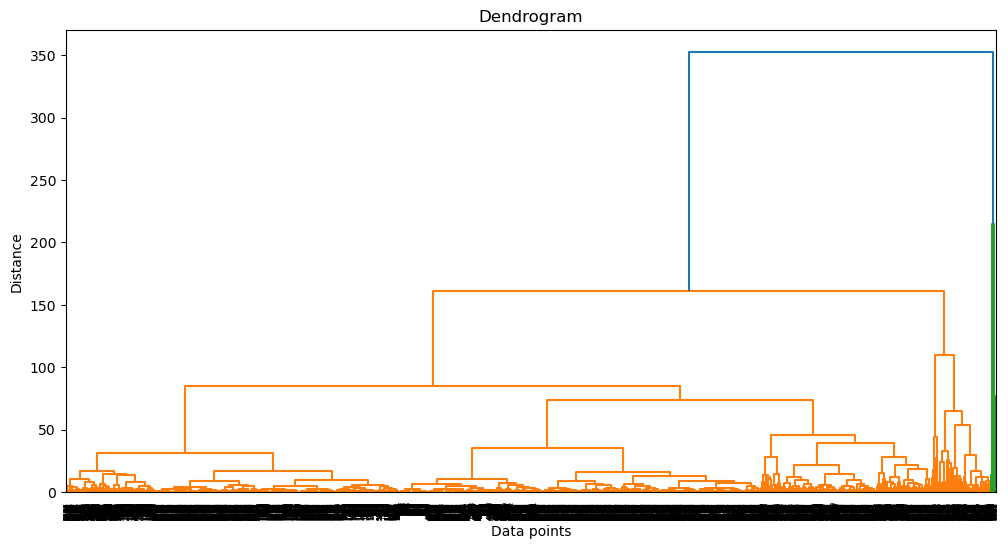

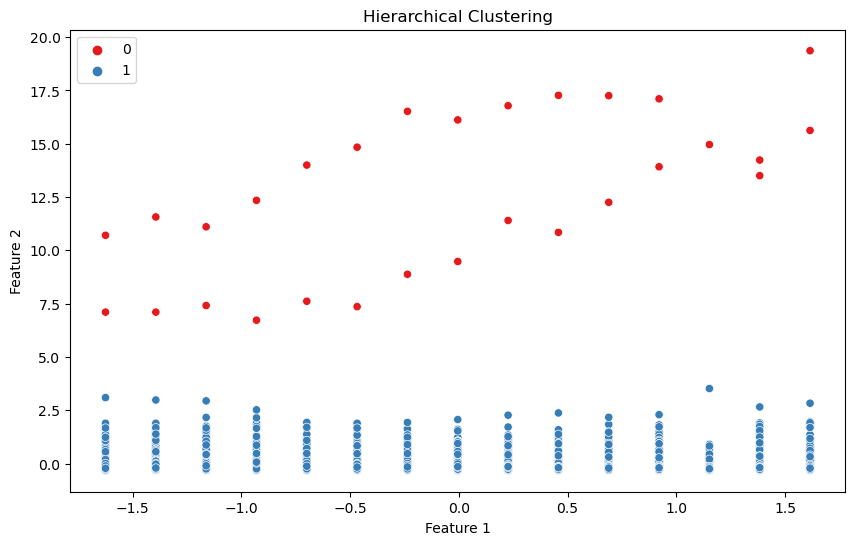

In [138]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Drop non-numeric columns
numeric_df = general_homeless_cols.drop(columns=['State_Territory', 'CoC Number', 'CoC Name', 'Count Types'])

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_df)

# We will use Ward linkage and let the algorithm determine the number of clusters
clustering = AgglomerativeClustering(linkage='ward').fit(scaled_data)

# Plotting a dendrogram to visualize the hierarchical clustering
# This helps in determining the optimal number of clusters
plt.figure(figsize=(12, 6))
dendrogram(linkage(scaled_data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data points')
plt.ylabel('Distance')
plt.show()

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=scaled_data[:,0], y=scaled_data[:,1], hue=clustering.labels_, palette='Set1', legend='full')
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
